In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

In [2]:
import calendar

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
from mpl_toolkits.basemap import Basemap

# read all the csv file
all the files have been read except 2012. Data in 2012 file is same as 2014 file

In [4]:
df10= pd.read_csv('all_house_senate_2010.csv', low_memory = False) #read the csv
#df10.drop(df10.columns[[0, 2, 5,7, 8,9,10,12,13,14,16, 20,21,22, 23,25]], axis=1, inplace = True) # drop certain columns to reduce the size
df10['dis_amo'] = df10['dis_amo'].apply((lambda x: str(x).replace('$',"").replace(',',"").replace(')',"").replace('(',"-"))) #data cleaning in the amount column to remove $, (, )
df10['ele_yea'] = df10['ele_yea'].astype(np.int16) #
df10['dis_amo'] = df10['dis_amo'].astype(np.float32)
df10['dis_amo'] = df10['dis_amo']/1000000 # to convert value in $ M

In [5]:
df16= pd.read_csv('all_house_senate_2016.csv', low_memory = False, encoding='ANSI')
#df16.drop(df16.columns[[0, 2, 5,7, 8,9,10,12,13,14,16, 20,21,22, 23,25]], axis=1, inplace = True)
df16['dis_amo'] = df16['dis_amo'].apply((lambda x: str(x).replace('$',"").replace(',',"").replace(')',"").replace('(',"-"))) #
df16['ele_yea'] = df16['ele_yea'].astype(np.int16)
df16['dis_amo'] = df16['dis_amo'].astype(np.float32)
df16['dis_amo'] = df16['dis_amo']/1000000 # to convert value in $ M

In [6]:
df14= pd.read_csv('all_house_senate_2014.csv', low_memory = False)
#df14.drop(df14.columns[[0, 2, 5,7, 8,9,10,12,13,14,16, 20,21,22, 23,25]], axis=1, inplace = True)
df14['dis_amo'] = df14['dis_amo'].apply((lambda x: str(x).replace('$',"").replace(',',"").replace(')',"").replace('(',"-")))
df14['ele_yea'] = df14['ele_yea'].astype(np.int16)
df14['dis_amo'] = df14['dis_amo'].astype(np.float32)
df14['dis_amo'] = df14['dis_amo']/1000000 # to convert value in $ M

Removal of outliers

In [7]:
df10['dis_amo'] = df10['dis_amo'][~((df10['dis_amo']-df10['dis_amo'].mean()).abs()>3*df10['dis_amo'].std())]
df14['dis_amo'] = df14['dis_amo'][~((df14['dis_amo']-df14['dis_amo'].mean()).abs()>3*df14['dis_amo'].std())]
df16['dis_amo'] = df16['dis_amo'][~((df16['dis_amo']-df16['dis_amo'].mean()).abs()>3*df16['dis_amo'].std())]

Converting all the dates to year 201X(equivalent to the file name) and changing the dtype to datetime

In [8]:
df16['dis_dat'] = pd.to_datetime(df16['dis_dat'].map(lambda x : '2016-'+ str(x)[4:]))

In [9]:
df10['dis_dat'] = pd.to_datetime(df10['dis_dat'].map(lambda x : '2010-'+ str(x)[4:]))

In [10]:
df14['dis_dat'] = pd.to_datetime(df14['dis_dat'].map(lambda x : '2014-'+ str(x)[4:]))

## Various Graphs for different Years

In [11]:
years = ['2010', '2014', '2016'];
data = [df10, df14, df16]
expend = [df10['dis_amo'].sum(), df14['dis_amo'].sum(), df16['dis_amo'].sum()] # to calculate the total expenditure in all years
no_can = [len(df10.groupby('can_nam')['can_nam']),len(df14.groupby('can_nam')['can_nam']),len(df16.groupby('can_nam')['can_nam'])] # to calculate the number of candidates in each year
ave_exp = np.divide(expend,no_can)

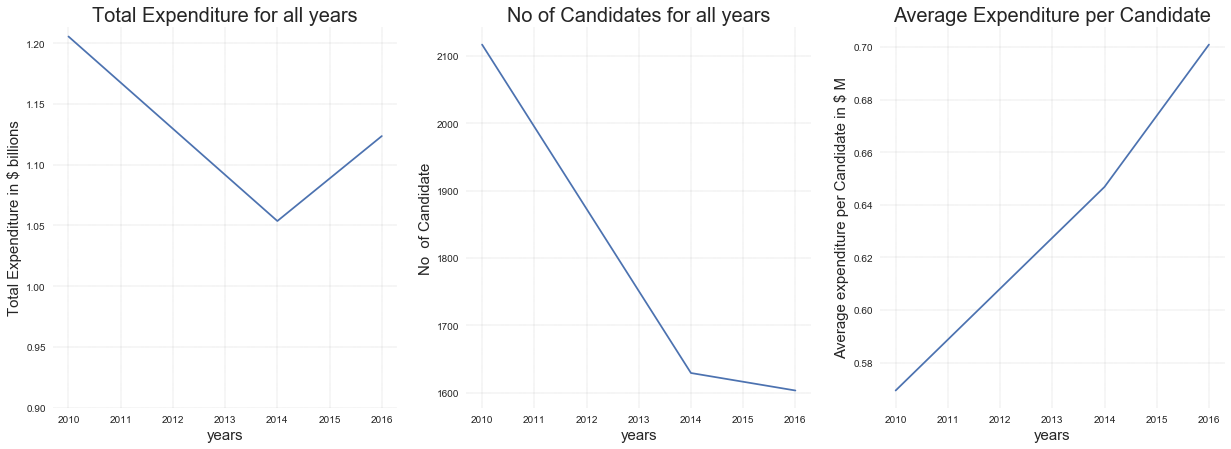

In [12]:
fig, axes = plt.subplots(1,3, figsize=(21,7))
     
axes[0].plot(years, np.divide(expend,1000));# to plot a bar plot for year vs expenditure
axes[0].set_title('Total Expenditure for all years', fontsize=20); #to change the title
axes[0].set_xlabel('years', fontsize=15); # to change the xlabel
axes[0].set_ylabel('Total Expenditure in $ billions', fontsize=15); # to change the y label
axes[0].set_yticks(np.linspace(0.9,1.2,7)); #to rearrange the y axis ticks
axes[0].set_facecolor('white'); # To make it look without any background
axes[0].grid(color='black', linestyle='-.', linewidth=.1)

axes[1].plot(years, no_can);
axes[1].set_title('No of Candidates for all years', fontsize=20);
axes[1].set_xlabel('years', fontsize=15);
axes[1].set_ylabel('No  of Candidate', fontsize=15);
axes[1].set_facecolor('white');
axes[1].grid(color='black', linestyle='-.', linewidth=.1);

axes[2].plot(years, ave_exp);
axes[2].set_title('Average Expenditure per Candidate', fontsize=20);
axes[2].set_xlabel('years', fontsize=15);
axes[2].set_ylabel('Average expenditure per Candidate in $ M', fontsize=15);
axes[2].set_facecolor('white');
axes[2].grid(color='black', linestyle='-.', linewidth=.1);

## Variation of disbursement amount throughout the year for each year

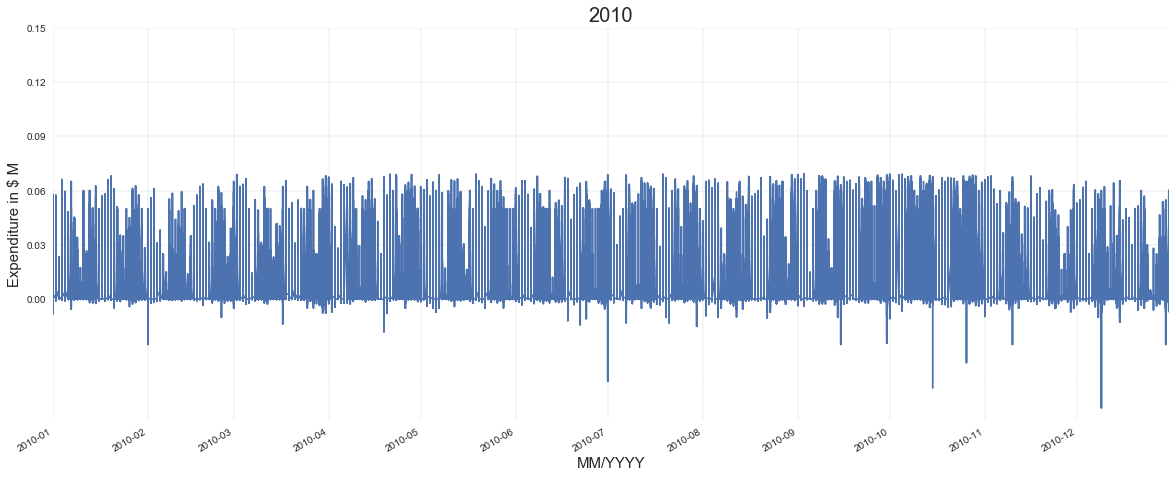

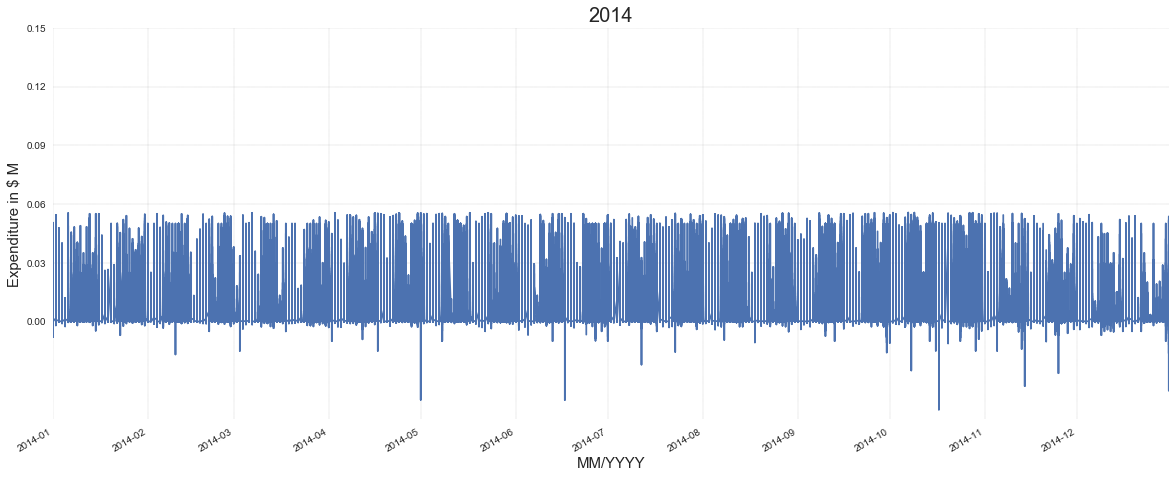

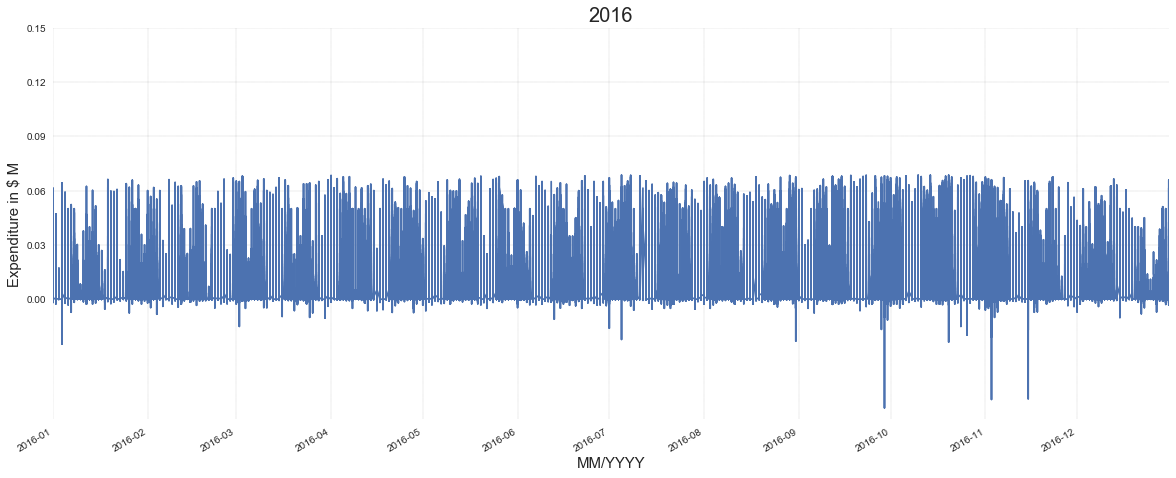

In [13]:

for year, df in zip(years, data):
    ax = df.set_index('dis_dat')['dis_amo'].plot(figsize=(20,8))
    plt.title('{}'.format(year), fontsize=20)
    plt.xlabel('MM/YYYY', fontsize=15)
    plt.ylabel('Expenditure in $ M', fontsize=15)
    plt.grid(color='black', linestyle='-', linewidth=.1);
    plt.yticks(list(np.linspace(0, .15000, 6)))
    ax.set_facecolor('white')
    ax.grid(color='black', linestyle='-.', linewidth=.1);
    plt.show()

## Ditribution of expenditure per candidate grouped as per office 

In [14]:
for df, year in zip(data, years):
    df.pivot_table(values = 'dis_amo', aggfunc = 'sum', index='dis_dat', columns='can_off').iplot(kind='box', xTitle = 'Candidate Office', yTitle = 'Expenditure Range in $ M', title='Distribution of expenditure for each office in year {}'.format(year))

## Top 10 states by expenditure

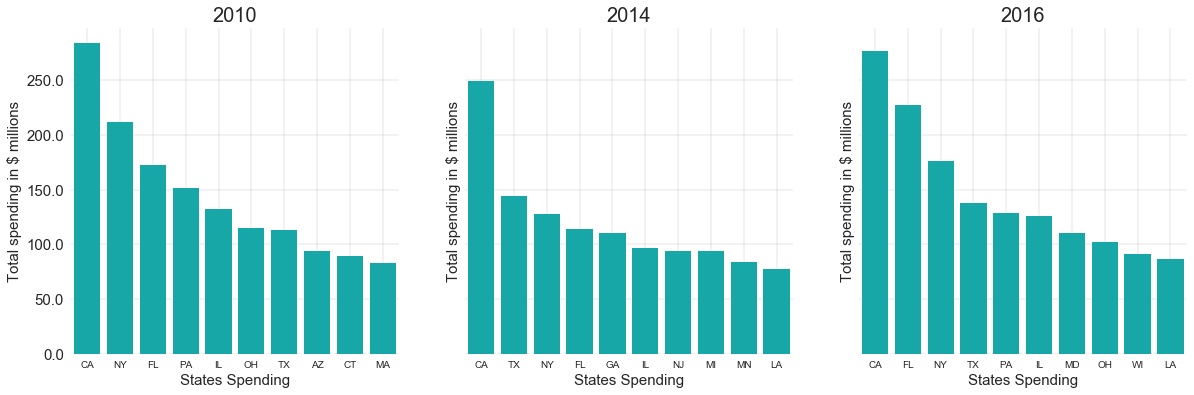

In [15]:
fig, axes = plt.subplots(1,3, figsize=(20,6), sharey= True)  
for year, df, ax in zip(years, data, axes):
    sns.barplot(x = df.groupby('can_off_sta').sum().nlargest(10, 'dis_amo').index, y =df.groupby('can_off_sta').sum().nlargest(10, 'dis_amo')['dis_amo'], color='c', ax=ax)
    ax.set_title('{}'.format(year), fontsize=20)
    ax.set_xlabel('States Spending', fontsize = 15);
    ax.set_ylabel('Total spending in $ millions', fontsize= 15);
    ax.set_yticklabels(np.linspace(0,350, 8), fontsize=15, animated= True);
    ax.set_facecolor('white');
    ax.grid(color='black', linestyle='-', linewidth=.1);

# Focusing only on states that have maximum expenditure 

##### Top four states are CA, FL, NY, TX  

In [16]:
df10 = df10[(df10['can_off_sta']=='CA')|(df10['can_off_sta']=='FL')|(df10['can_off_sta']=='NY')|(df10['can_off_sta']=='TX')]
df14 = df14[(df14['can_off_sta']=='CA')|(df14['can_off_sta']=='FL')|(df14['can_off_sta']=='NY')|(df14['can_off_sta']=='TX')]
df16 = df16[(df16['can_off_sta']=='CA')|(df16['can_off_sta']=='FL')|(df16['can_off_sta']=='NY')|(df16['can_off_sta']=='TX')]

In [17]:
data = df10.copy()
data = data.append(df14)
data = data.append(df16)
del df10
del df14
del df16

In [18]:
data['can_off'].unique() # that means only two offices participated
data['year'] = data['dis_dat'].map(lambda x: x.year);

## Amount spent by these four states for both offices

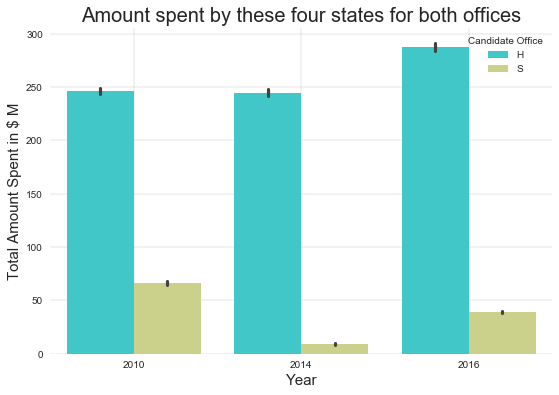

In [28]:
fig, ax = plt.subplots(figsize=(9,6))
ax = sns.barplot(x='year', y='dis_amo', hue = 'can_off', estimator = np.sum, data= data , palette='rainbow') ;
ax.legend(title = 'Candidate Office', loc='upper right');
ax.set_title("Amount spent by these four states for both offices", fontsize=20);
ax.set_xlabel('Year', fontsize = 15);
ax.set_ylabel("Total Amount Spent in $ M", fontsize= 15);
ax.set_facecolor('white')
ax.grid(color='black', linestyle='-', linewidth=.1);

## State to State expenditure (within these four states) 

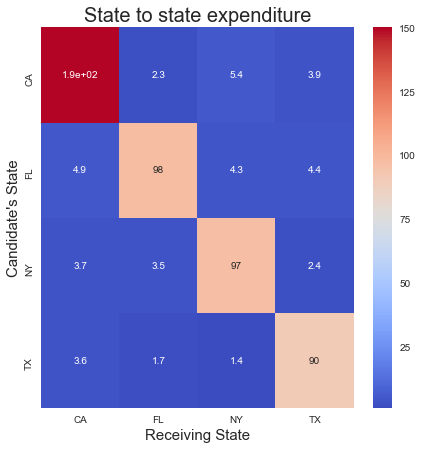

In [20]:
new = data[(data['rec_sta']=='CA')|(data['rec_sta']=='FL')|(data['rec_sta']=='NY')|(data['rec_sta']=='TX')];
new=new.pivot_table(values='dis_amo', columns = 'rec_sta', index = 'can_off_sta', aggfunc = 'sum');
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(new,cmap='coolwarm',annot=True, vmin=1, vmax=150) ;
ax.set_title('State to state expenditure', fontsize=20);
ax.set_xlabel('Receiving State', fontsize = 15);
ax.set_ylabel("Candidate's State", fontsize= 15);
del new;

## Total expenditure in various categories

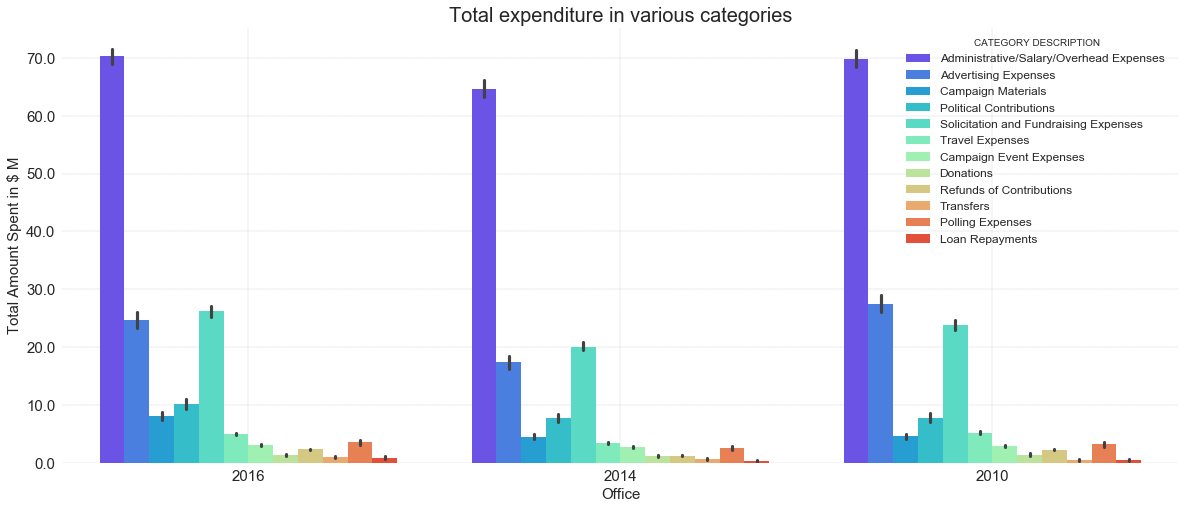

In [21]:
fig, ax = plt.subplots(figsize=(20,8));
sns.barplot(x='year', y='dis_amo', hue = 'cat_des', estimator = np.sum, data= data, palette='rainbow',  ax=ax) ;
#ax.set(xlabel='Office', ylabel='Total Amount Spent in $ M');
ax.set_title('Total expenditure in various categories', fontsize=20)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Total Amount Spent in $ M', fontsize= 15)
ax.set_yticklabels(np.linspace(0,70, 8), fontsize=15, animated= True)
ax.set_xticklabels({'2010', '2014', '2016'}, fontsize=15, animated= True)
ax.set_facecolor('white')
ax.grid(color='black', linestyle='-.', linewidth=.1);
ax.legend(title = 'CATEGORY DESCRIPTION', fontsize=12);

In [22]:
data['month'] = data['dis_dat'].map(lambda x: x.month);
data = data.sort_values('month', ascending=True);
data['month'] = data['dis_dat'].apply(lambda x: calendar.month_abbr[x.month]);
pvdata= data.pivot_table(values= 'dis_amo', index = 'cat_des', columns='month', aggfunc=np.sum);

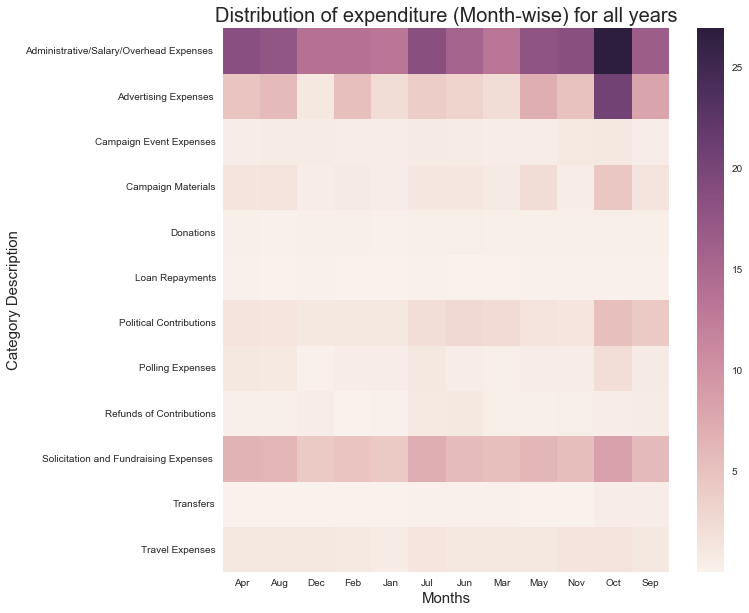

In [23]:
fig, ax = plt.subplots(figsize=(10,10));
ax = sns.heatmap(pvdata,);
ax.set_title('Distribution of expenditure (Month-wise) for all years', fontsize=20);
ax.set_xlabel('Months', fontsize = 15);
ax.set_ylabel('Category Description', fontsize= 15);

## Average expenditure in each category

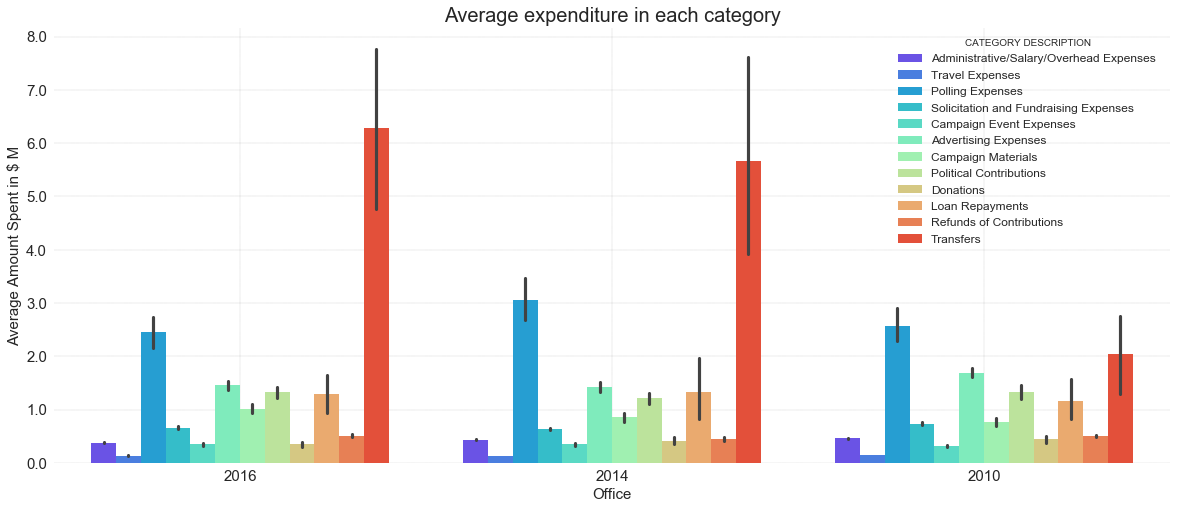

In [24]:
fig, ax = plt.subplots(figsize=(20,8));
sns.barplot(x='year', y='dis_amo', hue = 'cat_des', estimator = np.mean, data= data, palette='rainbow',  ax=ax) ;
#ax.set(xlabel='Office', ylabel='Total Amount Spent in $ M');
ax.set_title('Average expenditure in each category', fontsize=20);
ax.set_xlabel('Office', fontsize = 15);
ax.set_ylabel('Average Amount Spent in $ M', fontsize= 15);
ax.set_yticklabels(np.linspace(0,10, 11), fontsize=15, animated= True);
ax.set_xticklabels({'2010', '2014', '2016'}, fontsize=15, animated= True);
ax.set_facecolor('white');
ax.grid(color='black', linestyle='-.', linewidth=.1);
ax.legend(title = 'CATEGORY DESCRIPTION', fontsize=12);

# Distribution of transaction money 

## For Administrative Expenses (trimmed to show the majority of data clearly)

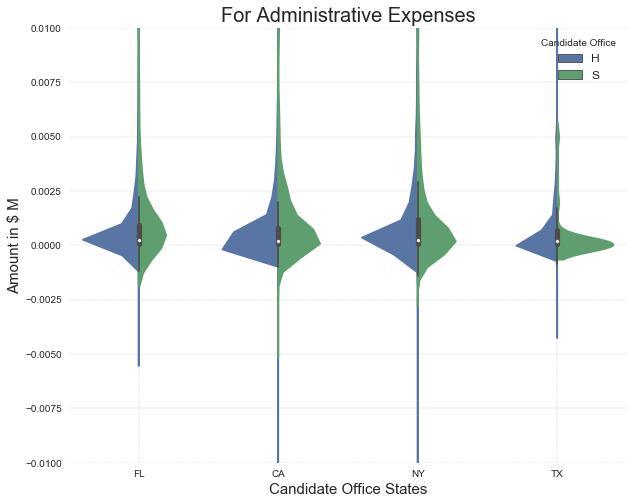

In [30]:
fig, axes = plt.subplots(figsize=(10,8));
sns.violinplot(x='can_off_sta', y = 'dis_amo', hue='can_off', data= data[data['cat_des'] == 'Administrative/Salary/Overhead Expenses '], split = True);
plt.ylim(-0.01,0.01);
axes.legend( title = 'Candidate Office', fontsize=12);
plt.title('For Administrative Expenses', fontsize=20);
plt.xlabel('Candidate Office States', fontsize=15)
plt.ylabel('Amount in $ M', fontsize=15)
axes.set_facecolor('white');
axes.grid(color='black', linestyle='-.', linewidth=.1);

## For Transfers Expenses

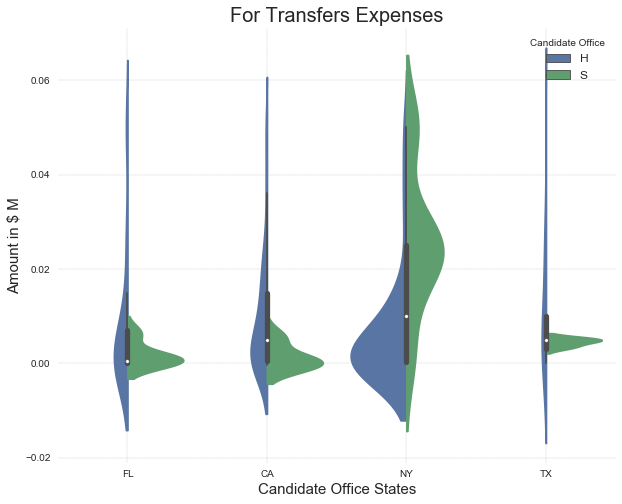

In [35]:
fig, axes = plt.subplots(figsize=(10,8));
sns.violinplot(x='can_off_sta', y = 'dis_amo', hue='can_off', data = data[data['cat_des'] == 'Transfers'], split = True);
plt.xlabel('Candidate Office States', fontsize=15);
plt.title('For Transfers Expenses', fontsize=20);
plt.ylabel('Amount in $ M', fontsize=15);
axes.set_facecolor('white');
axes.grid(color='black', linestyle='-.', linewidth=.1);
axes.legend(title = 'Candidate Office', fontsize=12);